## Notebook para comparar dados da bacia do rio Purus

Exemplo em Aula - Rio Purus

Dados da Base CABra:

* Evapotranspiração GLEAM, MODIS (Evapotranspiração Potencial)
* Precipitação média na bacia (CABra, Thiessen, média aritmética, inverso da distância)
* Vazão ANA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy

In [7]:
# Baixa dados da base CABra
!gdown 16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4
# Baixa dados de precipitação média calculados na aula 9 (Thiessen e média aritmética)
!gdown 1xwMI8587BCTYnJHQq2bgStrnBjmxYPOo
# Baixa dados de Evapotranspiração MODIS
!gdown 1ke2Bz02ezh5wVZ6FrHL_akMSirMLhoOk
# Baixa dados de Evapotranspiração Potencial MODIS
!gdown 1LjvlVm2ixW5tY0tmrqsvrtCZiqzKsD6y
# Baixa dados da base CHIRPS
!gdown 1Z9SQGph3kOU3GafkUrmM1_6lVI9VHFP6

Downloading...
From: https://drive.google.com/uc?id=16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4
To: /content/CABra_1_climate+streamflow_edit.csv
100% 904k/904k [00:00<00:00, 103MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xwMI8587BCTYnJHQq2bgStrnBjmxYPOo
To: /content/prec_espacializada_Purus.csv
100% 855k/855k [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ke2Bz02ezh5wVZ6FrHL_akMSirMLhoOk
To: /content/modis_ET_daily.csv
100% 345k/345k [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LjvlVm2ixW5tY0tmrqsvrtCZiqzKsD6y
To: /content/modis_PET_daily.csv
100% 339k/339k [00:00<00:00, 148MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z9SQGph3kOU3GafkUrmM1_6lVI9VHFP6
To: /content/ClimateEngine_Purus_CHIRPS.csv
100% 312k/312k [00:00<00:00, 105MB/s]


In [12]:
# dados da base CHIRPS
Purus_CHIRPS = pd.read_csv('ClimateEngine_Purus_CHIRPS.csv',
                          sep=';', index_col=[0])
Purus_CHIRPS.index=pd.to_datetime(Purus_CHIRPS.index)
Purus_CHIRPS = Purus_CHIRPS.replace(regex={',': '.'}).astype(float)
#Purus_CHIRPS

In [13]:
# leitura dos dados com pandas
df_PET_MODIS = pd.read_csv('modis_PET_daily.csv')
df_PET_MODIS['data'] = pd.to_datetime(df_PET_MODIS['Date'])
df_PET_MODIS = df_PET_MODIS.set_index('data')
#df_PET_MODIS

In [14]:
# leitura dos dados com pandas
df_MODIS = pd.read_csv('modis_ET_daily.csv')
df_MODIS['data'] = pd.to_datetime(df_MODIS['Date'])
df_MODIS = df_MODIS.set_index('data')
#df_MODIS

In [21]:
# Dados de pluviômetros
Purus_pluviom = pd.read_csv('prec_espacializada_Purus.csv',
                          sep=',', index_col=[0])
Purus_pluviom.index=pd.to_datetime(Purus_pluviom.index)
#Purus_pluviom

In [24]:
# leitura dos dados com pandas
df_cabra = pd.read_csv('CABra_1_climate+streamflow_edit.csv')
df_cabra['data'] = pd.to_datetime(df_cabra['data'])
df_cabra = df_cabra.set_index('data')
df_cabra.columns

Index(['p_ens(mm)', 'tmin_ens(oC)', 'tmax_ens(oC)', 'rh_ens(%)',
       'wnd_ens(m/s)', 'srad_ens(MJm-2)', 'et_ens(mm)', 'pet_pm(mm)',
       'pet_pt(mm)', 'pet_hg(mm)', 'Streamflow(m3/s)'],
      dtype='object')

In [26]:
df_MODIS.columns

Index(['Date', 'Purus ET (mm/d)', 'Hari ET (mm/d)', 'Nhundiaquara ET (mm/d)',
       'Ahja ET (mm/d)'],
      dtype='object')

# Unificar os dados em um único dataframe



In [28]:
from typing_extensions import DefaultDict
# Cria DataFrame contendo as colunas de interesse
df = pd.DataFrame()
df['prec_CHIRPS(mm)'] = Purus_CHIRPS['1981-01-01':'2009-12-31']
df['prec_PLUVIO_Thi(mm)'] = Purus_pluviom['1981-01-01':'2009-12-31']['media thiessen']
df['prec_PLUVIO_Ari(mm)'] = Purus_pluviom['1981-01-01':'2009-12-31']['media aritmetica']
df['prec_PLUVIO_Cab(mm)'] = df_cabra['1981-01-01':'2009-12-31']['p_ens(mm)']
df[['et_ens(mm)', 'pet_pm(mm)','pet_pt(mm)', 'pet_hg(mm)', 'Streamflow(m3/s)']] = df_cabra['1981-01-01':'2009-12-31'][['et_ens(mm)', 'pet_pm(mm)','pet_pt(mm)', 'pet_hg(mm)', 'Streamflow(m3/s)']]
df['Purus ET (mm/d)'] = df_MODIS['1981-01-01':'2009-12-31']['Purus ET (mm/d)']
df['Purus PET (mm/d)'] = df_PET_MODIS['1981-01-01':'2009-12-31']['Purus PET (mm/d)']
df

,prec_CHIRPS(mm),prec_PLUVIO_Thi(mm),prec_PLUVIO_Ari(mm),prec_PLUVIO_Cab(mm),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s),Purus ET (mm/d),Purus PET (mm/d)
1981-01-01,10.8982,5.376438,6.140144,6.233,5.382,4.494,5.289,4.214,4662.160,NaN,NaN
1981-01-02,11.2424,22.177539,18.935254,22.345,5.959,3.754,4.553,3.527,4631.720,NaN,NaN
1981-01-03,15.9600,14.650725,22.142573,8.493,4.239,4.034,4.915,3.857,4624.440,NaN,NaN
1981-01-04,13.6556,20.789195,18.065169,7.291,4.244,3.972,4.735,3.683,4700.760,NaN,NaN
1981-01-05,25.4458,25.131866,23.753187,9.607,5.097,3.859,4.667,3.630,4731.640,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,2.2693,5.659130,4.469663,5.233,4.691,5.219,6.197,5.009,6586.392,2.256157,2.868861
2009-12-28,10.4792,10.005753,7.233075,10.419,4.388,4.060,4.784,3.764,6814.697,2.856194,3.685066
2009-12-29,2.5008,3.042021,3.791702,5.966,4.441,4.980,5.800,4.659,7100.611,3.216217,4.174790
2009-12-30,6.5010,0.971136,1.312114,5.343,4.691,4.951,5.807,4.668,7322.299,3.432230,4.468624


In [29]:
df.isna().sum()

prec_CHIRPS(mm)           0
prec_PLUVIO_Thi(mm)       0
prec_PLUVIO_Ari(mm)       0
prec_PLUVIO_Cab(mm)       0
et_ens(mm)                0
pet_pm(mm)                0
pet_pt(mm)                0
pet_hg(mm)                0
Streamflow(m3/s)          0
Purus ET (mm/d)        6939
Purus PET (mm/d)       6939
dtype: int64

In [30]:
df = df['2000':'2009']
df

,prec_CHIRPS(mm),prec_PLUVIO_Thi(mm),prec_PLUVIO_Ari(mm),prec_PLUVIO_Cab(mm),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s),Purus ET (mm/d),Purus PET (mm/d)
2000-01-01,19.3177,26.097549,13.274755,9.116,4.655,3.328,4.030,3.091,7502.836,3.371875,4.506250
2000-01-02,6.4512,5.170385,17.459539,12.078,3.759,3.573,4.332,3.354,7686.228,3.407031,4.488672
2000-01-03,6.0246,1.997049,4.958455,4.406,4.533,4.702,5.656,4.519,7844.371,3.417793,4.483291
2000-01-04,0.4069,3.992546,3.200505,6.008,3.921,5.314,6.330,5.126,7995.119,3.422541,4.480917
2000-01-05,7.7203,0.772986,2.799799,8.521,4.347,4.161,4.984,3.938,8157.330,3.424963,4.479706
...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,2.2693,5.659130,4.469663,5.233,4.691,5.219,6.197,5.009,6586.392,2.256157,2.868861
2009-12-28,10.4792,10.005753,7.233075,10.419,4.388,4.060,4.784,3.764,6814.697,2.856194,3.685066
2009-12-29,2.5008,3.042021,3.791702,5.966,4.441,4.980,5.800,4.659,7100.611,3.216217,4.174790
2009-12-30,6.5010,0.971136,1.312114,5.343,4.691,4.951,5.807,4.668,7322.299,3.432230,4.468624


In [31]:
df.isna().sum()

prec_CHIRPS(mm)        0
prec_PLUVIO_Thi(mm)    0
prec_PLUVIO_Ari(mm)    0
prec_PLUVIO_Cab(mm)    0
et_ens(mm)             0
pet_pm(mm)             0
pet_pt(mm)             0
pet_hg(mm)             0
Streamflow(m3/s)       0
Purus ET (mm/d)        0
Purus PET (mm/d)       0
dtype: int64

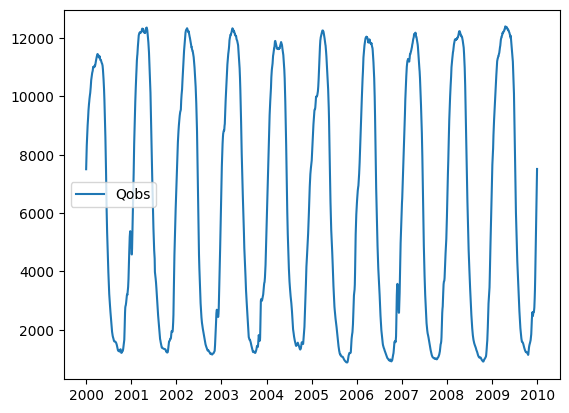

In [32]:
# Plot last full hydrological year of the simulation
%matplotlib inline
start_date = pd.to_datetime("2000-01-01", yearfirst=True)
end_date = pd.to_datetime("2009-12-31", yearfirst=True)
plt.plot(df_cabra.loc[start_date:end_date, 'Streamflow(m3/s)'], label='Qobs')
#plt.plot(val.loc[start_date:end_date, 'qsim_mc'], label='Qsim mc')
plt.legend()

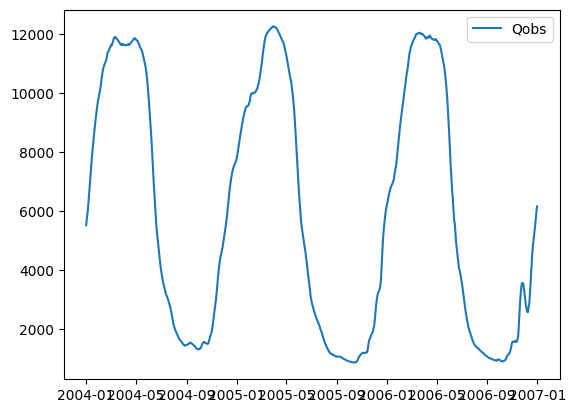

In [33]:
# Plot last full hydrological year of the simulation
%matplotlib inline
start_date = pd.to_datetime("2004-01-01", yearfirst=True)
end_date = pd.to_datetime("2006-12-31", yearfirst=True)
plt.plot(df_cabra.loc[start_date:end_date, 'Streamflow(m3/s)'], label='Qobs')
#plt.plot(val.loc[start_date:end_date, 'qsim_mc'], label='Qsim mc')
plt.legend()

## Chuva-Vazão Purus

In [34]:
from datetime import datetime, timedelta

<Figure size 640x480 with 0 Axes>

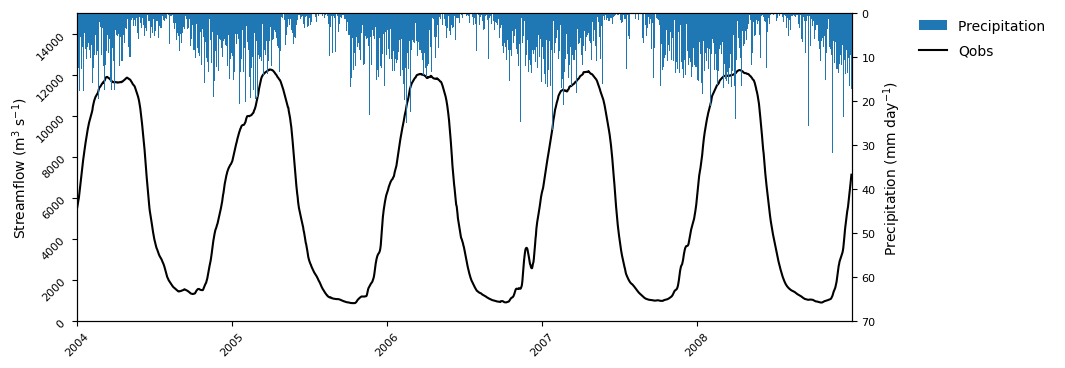

In [35]:
plt.gcf().autofmt_xdate()

fig, ax1 = plt.subplots(figsize=(10,4))

start_date = pd.to_datetime("2004-01-01", yearfirst=True)
end_date = pd.to_datetime("2008-12-31", yearfirst=True)

ax1.plot(df_cabra.loc[start_date:end_date, 'Streamflow(m3/s)'], label='Qobs', color = 'black')
#ax1.plot(val.loc[start_date:end_date, 'qsim_fit_Reola'], label='Qsim .fit()')
#ax1.plot(val.loc[start_date:end_date, 'qsim_mc'], label='Qsim mc')
ax1.set_ylim(0,15000)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=8,rotation=45) #increase font size for ticks
ax1.set_ylabel(r'Streamflow (m$^3$ s$^{-1}$)', fontsize=10) #y label

ax1.legend(bbox_to_anchor=(1.19, 0.92), borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(df_cabra.loc[start_date:end_date].index,df_cabra.loc[start_date:end_date]['p_ens(mm)'], width=1.8, label = 'Precipitation ')
#ax2.bar(val['2018-01-01':'2019-12-31'].index+timedelta(hours=6),val.loc[start_date:end_date,'P voru x10 (mm/day)'], width=1.8, label = 'Voru Precipitation ')
#ax2.bar(val['2018-01-01':'2019-12-31'].index+timedelta(hours=12),val.loc[start_date:end_date,'P smear (mm/day)'], width=1.8, label = 'Smear Precipitation ')

ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel(r'Precipitation (mm day$^{-1}$)', fontsize=10) #y label
ax2.set_ylim(70,0)
ax2.legend(loc=0)

leg = plt.legend();

plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.savefig('_chuva_vazao_Purus.png', dpi = 300, bbox_inches='tight')
plt.show()

#### Missing data

In [36]:
print('Falhas no dataframe:')
print(df_cabra.isnull().sum())
# val['T smear mean (oC)'] = val['T smear mean (oC)'].fillna(val['T tartu mean (oC)'])
# val['T smear max (oC)'] = val['T smear max (oC)'].fillna(val['T tartu max (oC)'])
# val['T smear min (oC)'] = val['T smear min (oC)'].fillna(val['T tartu min (oC)'])
# print('\n Preenchimento das Falhas:')
# print(val.isnull().sum())

Falhas no dataframe:
p_ens(mm)           0
tmin_ens(oC)        0
tmax_ens(oC)        0
rh_ens(%)           0
wnd_ens(m/s)        0
srad_ens(MJm-2)     0
et_ens(mm)          0
pet_pm(mm)          0
pet_pt(mm)          0
pet_hg(mm)          0
Streamflow(m3/s)    0
dtype: int64


In [37]:
df.to_csv('df_purus_varias_bases_de_dados.csv')